# Project Introduction

- Hotel reservation booking data analytics involves the process of collecting, analyzing, and interpreting data related to hotel reservations to make informed decisions.
- This practice can enhance operational efficiency, improve customer satisfaction, and increase revenue.
- Data analytics can provide valuable insights into customer behavior, booking patterns, and market trends.

https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset/data
https://www.kaggle.com/code/dinachanthan/hotel-booking-reservation-predition

This notebook aim to build a machine learning model to predict hotel reservation cancellations that involved several steps.

1. Data Preprocessing:
- Clean the data (handle missing values, correct data types, etc.).
- Encode categorical variables.
- Normalize/standardize the numerical features if necessary.
2. Feature Selection:
- Identify which features might be important for predicting cancellations.
3. Model Selection:
- Choose an appropriate machine learning algorithm (e.g., logistic regression, decision tree, random forest, etc.).
4. Model Training:
- Split the data into training and testing sets.
- Train the model on the training data.
5. Model Evaluation:
- Evaluate the model using the testing data (e.g., accuracy, precision, recall, F1 score).
6. Hyperparameter Tuning:
- Optimize the model parameters for better performance.
7. Model Deployment:
- Prepare the model for deployment (e.g., saving the model, creating an API).

In [1]:
#Install gradio: Gradio is the fastest way to demo your machine learning model with a friendly web interface so that anyone can use it, anywhere!
!pip install gradio

  Using cached h11-0.14.0-py3-none-any.whl.metadata (8.2 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
INFO: pip is looking at multiple versions of ffmpy to determine which version is compatible with other requirements. This could take a while.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 5.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 6.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 5.3 MB/s eta 0:00:0000:010:01
Using cached h11-0.14.0-py3-none-any.whl (58 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=5582 sha256=13d0c6e53b43a081d261a13e9b881eca5c28f4e5fe6d05255404b00097aea591
  Stored in directory: /Users/maohieng/Library/Caches/pip/wheels/e1/2c/52/5e817a3b09f1

#Importing Library

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import gradio as gr
import seaborn as sns
import matplotlib.pyplot as plt

/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#Loading Dataset

In [3]:
# loading dataset
data = pd.read_csv('Hotel_Reservations.csv')

#Exploratory Data Analysis - EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## About this file

**Add Suggestion**

- The file contains the different attributes of customers' reservation details. The detailed data dictionary is given below.

**Data Dictionary**

- **Booking_ID**: unique identifier of each booking
- **no_of_adults**: Number of adults
- **no_of_children**: Number of Children
- **no_of_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- **no_of_week_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- **type_of_meal_plan**: Type of meal plan booked by the customer:
- **required_car_parking_space**: Does the customer require a car parking space? (0 - No, 1- Yes)
- **room_type_reserved**: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
- **lead_time**: Number of days between the date of booking and the arrival date
- **arrival_year**: Year of arrival date
- **arrival_month**: Month of arrival date
- **arrival_date**: Date of the month
- **market_segment_type**: Market segment designation.
- **repeated_guest**: Is the customer a repeated guest? (0 - No, 1- Yes)
- **no_of_previous_cancellations**: Number of previous bookings that were canceled by the customer prior to the current booking
- **no_of_previous_bookings_not_canceled**: Number of previous bookings not canceled by the customer prior to the current booking
- **avg_price_per_room**: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
- **no_of_special_requests**: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- **booking_status**: Flag indicating if the booking was canceled or not.

In [6]:
# Descriptive statistic on dataset on numerical columns
data[['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
    'no_of_week_nights', 'required_car_parking_space', 'lead_time',
    'arrival_year', 'arrival_month', 'arrival_date',
    'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
    'avg_price_per_room', 'no_of_special_requests']].describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


Feature Descriptions and Statistics:

a). no_of_adults

- Count: 36,275 entries
- Mean: 1.84 adults
- Standard Deviation (std): 0.52
- Minimum (min): 0
- 25th Percentile (25%): 2 adults
- Median (50%): 2 adults
- 75th Percentile (75%): 2 adults
- Maximum (max): 4 adults

b). no_of_children

- Count: 36,275 entries
- Mean: 0.11 children
- Standard Deviation (std): 0.40
- Minimum (min): 0
- 25th Percentile (25%): 0 children
- Median (50%): 0 children
- 75th Percentile (75%): 0 children
- Maximum (max): 10 children

c). no_of_weekend_nights

- Count: 36,275 entries
- Mean: 0.81 nights
- Standard Deviation (std): 0.87
- Minimum (min): 0 nights
- 25th Percentile (25%): 0 nights
- Median (50%): 1 night
- 75th Percentile (75%): 2 nights
- Maximum (max): 7 nights

d). no_of_week_nights

- Count: 36,275 entries
- Mean: 2.20 nights
- Standard Deviation (std): 1.41
- Minimum (min): 0 nights
- 25th Percentile (25%): 1 night
- Median (50%): 2 nights
- 75th Percentile (75%): 3 nights
- Maximum (max): 17 nights

e). lead_time

- Count: 36,275 entries
- Mean: 85.23 days
- Standard Deviation (std): 85.93
- Minimum (min): 0 days
- 25th Percentile (25%): 17 days
- Median (50%): 57 days
- 75th Percentile (75%): 126 days
- Maximum (max): 443 days

f). arrival_year

- Count: 36,275 entries
- Mean: 2017.82
- Standard Deviation (std): 0.38
- Minimum (min): 2017
- 25th Percentile (25%): 2018
- Median (50%): 2018
- 75th Percentile (75%): 2018
- Maximum (max): 2018

g). arrival_month

- Count: 36,275 entries
- Mean: 7.42 (July)
- Standard Deviation (std): 3.07
- Minimum (min): 1 (January)
- 25th Percentile (25%): 5 (May)
- Median (50%): 8 (August)
- 75th Percentile (75%): 10 (October)
- Maximum (max): 12 (December)

h). arrival_date

- Count: 36,275 entries
- Mean: 15.60
- Standard Deviation (std): 8.74
- Minimum (min): 1
- 25th Percentile (25%): 8
- Median (50%): 16
- 75th Percentile (75%): 23
- Maximum (max): 31

i). no_of_previous_cancellations

- Count: 36,275 entries
- Mean: 0.02 cancellations
- Standard Deviation (std): 0.37
- Minimum (min): 0
- 25th Percentile (25%): 0
- Median (50%): 0
- 75th Percentile (75%): 0
- Maximum (max): 13

j). no_of_previous_bookings_not_canceled

- Count: 36,275 entries
- Mean: 0.15 bookings
- Standard Deviation (std): 1.75
- Minimum (min): 0
- 25th Percentile (25%): 0
- Median (50%): 0
- 75th Percentile (75%): 0
- Maximum (max): 58

k). avg_price_per_room

- Count: 36,275 entries
- Mean: 103.42
- Standard Deviation (std): 35.09
- Minimum (min): 0
- 25th Percentile (25%): 80.3
- Median (50%): 99.45
- 75th Percentile (75%): 120
- Maximum (max): 540

l). no_of_special_requests

- Count: 36,275 entries
- Mean: 0.62 requests
- Standard Deviation (std): 0.79
- Minimum (min): 0
- 25th Percentile (25%): 0
- Median (50%): 0
- 75th Percentile (75%): 1
- Maximum (max): 5

**Summary**:

- The average booking typically involves around 2 adults with no children.
- Guests tend to stay for approximately 3 nights, including both weekdays and weekends.
- The lead time for bookings is about 85 days on average, indicating guests book well in advance.
- Most bookings occur in the year 2018, with a significant number in the months of July and August.
- There is a very low average number of previous cancellations and previous bookings not canceled, suggesting most bookings are from new customers.
- The average room price is about $103, with a wide range of prices indicating variability in room types or pricing strategies.
- On average, guests make fewer than one special request per booking.

# Data Preprocessing

In [7]:
# Dictionaries to store encoding and decoding maps
encoding_maps = {}
decoding_maps = {}

# Encode categorical variables
label_encoders = {}
for column in ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

    # Create encoding map
    encoding_map = {original: encoded for original, encoded in zip(label_encoders[column].classes_, label_encoders[column].transform(label_encoders[column].classes_))}
    encoding_maps[column] = encoding_map

    # Create decoding map
    decoding_map = {encoded: original for original, encoded in encoding_map.items()}
    decoding_maps[column] = decoding_map

In [11]:
# Print the encoding and decoding maps
print("Encoding Maps:", encoding_maps)

print("\nDecoding Maps:", decoding_maps)

Encoding Maps: {'type_of_meal_plan': {'Meal Plan 1': 0, 'Meal Plan 2': 1, 'Meal Plan 3': 2, 'Not Selected': 3}, 'room_type_reserved': {'Room_Type 1': 0, 'Room_Type 2': 1, 'Room_Type 3': 2, 'Room_Type 4': 3, 'Room_Type 5': 4, 'Room_Type 6': 5, 'Room_Type 7': 6}, 'market_segment_type': {'Aviation': 0, 'Complementary': 1, 'Corporate': 2, 'Offline': 3, 'Online': 4}, 'booking_status': {'Canceled': 0, 'Not_Canceled': 1}}

Decoding Maps: {'type_of_meal_plan': {0: 'Meal Plan 1', 1: 'Meal Plan 2', 2: 'Meal Plan 3', 3: 'Not Selected'}, 'room_type_reserved': {0: 'Room_Type 1', 1: 'Room_Type 2', 2: 'Room_Type 3', 3: 'Room_Type 4', 4: 'Room_Type 5', 5: 'Room_Type 6', 6: 'Room_Type 7'}, 'market_segment_type': {0: 'Aviation', 1: 'Complementary', 2: 'Corporate', 3: 'Offline', 4: 'Online'}, 'booking_status': {0: 'Canceled', 1: 'Not_Canceled'}}


# Feature & Target Selection

In [12]:
# Define features and target
X = data.drop(columns=['booking_status', 'Booking_ID'])
y = data['booking_status']

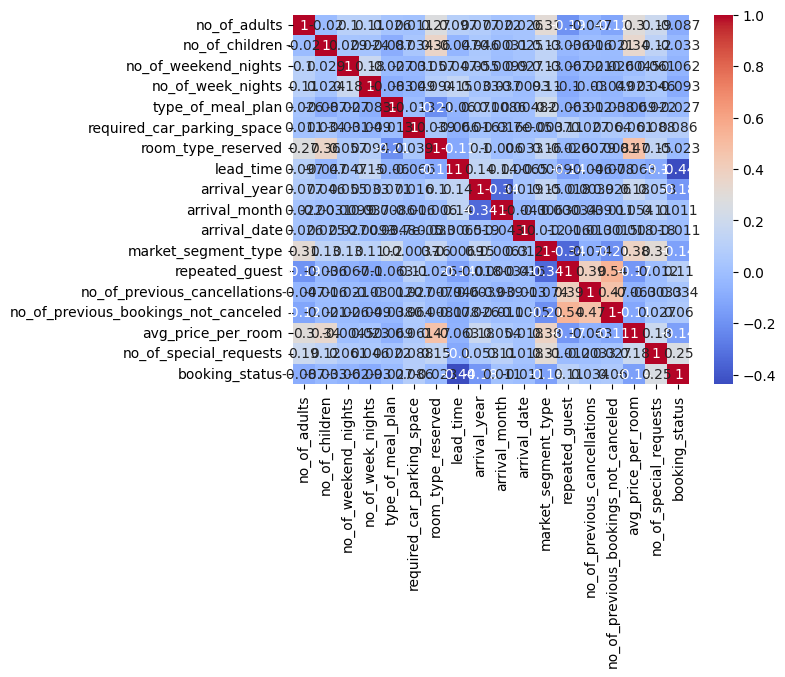

In [13]:
#Heatmap
xy = data.drop(columns=['Booking_ID'])
sns.heatmap(xy.corr(), annot=True, cmap='coolwarm')
plt.show()

# Split Train & Test Dataset

In [14]:
# Split the data into training and testing sets (8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Show feature train
X_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
25629,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0
14473,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2
23720,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0
5843,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0
18709,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0


In [16]:
# Show target train
y_train.head()

25629    1
14473    1
23720    0
5843     1
18709    0
Name: booking_status, dtype: int64

In [17]:
# Show feature test
X_test.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
4968,2,1,1,0,0,0,0,3,2017,8,23,4,0,0,0,90.00,3
34540,2,0,1,2,0,0,3,9,2018,2,12,3,0,0,0,48.67,0
36108,2,0,2,2,0,0,0,24,2018,12,25,4,0,0,0,95.20,1
1553,2,0,0,3,0,0,0,23,2018,6,21,4,0,0,0,127.67,0
24974,2,1,0,2,0,0,3,9,2018,9,8,4,0,0,0,201.50,2


In [18]:
# Show target test
y_test.head()

4968     1
34540    1
36108    1
1553     0
24974    1
Name: booking_status, dtype: int64

# Model Training
## Train using Logistic Regression

In [19]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#If you want to save the model for later use!
# import pickle

# with open("/content/sample_data/model.pkl", "wb") as f:
#     pickle.dump(model, f)

In [ ]:
#load a pretrained model
# with open("model.pkl", "rb") as f:
#     model = pickle.load(f)

## Model Evaluation

In [20]:
# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.58      0.65      2416
           1       0.81      0.90      0.85      4839

    accuracy                           0.79      7255
   macro avg       0.78      0.74      0.75      7255
weighted avg       0.79      0.79      0.79      7255



a). Class-wise Metrics:

**Class 0:**

- Precision (0.74): Out of all instances predicted as class 0, 74% were correctly identified.
- Recall (0.58): Out of all actual instances of class 0, 56% were correctly predicted.
- F1-Score (0.65): This is the harmonic mean of precision and recall, indicating a balance between the two metrics.
- Support (2416): There are 2416 actual instances of class 0 in the dataset.

**Class 1:**

- Precision (0.81): Out of all instances predicted as class 1, 82% were correctly identified.
- Recall (0.90): Out of all actual instances of class 1, 90% were correctly predicted.
- F1-Score (0.85): This is the harmonic mean of precision and recall for class 1.
- Support (4839): There are 4839 actual instances of class 1 in the dataset.

**b). Overall Metrics:**

- Accuracy (0.79):

>The model correctly predicts the class for 81% of the instances in the dataset.

- Macro Average:

> - Precision (0.78): This is the unweighted average precision across all classes.
> - Recall (0.74): This is the unweighted average recall across all classes.
> - F1-Score (0.75): This is the unweighted average F1-score across all classes.

- Weighted Average:
> - Precision (0.79): This is the average precision weighted by the number of instances in each class.
> - Recall (0.79): This is the average recall weighted by the number of instances in each class.
> - F1-Score (0.79): This is the average F1-score weighted by the number of instances in each class.

**c). Summary:**

> - Performance on Class 0: The logistic regression model has a precision of 74% and recall of 58% for class 0, leading to an F1-score of 65%.
> - Performance on Class 1: The model performs better on class 1, with a precision of 81% and recall of 90%, resulting in an F1-score of 85%.
> - Overall Performance: The overall accuracy of the model is 79%. The macro average metrics indicate some imbalance in performance between classes, while the weighted averages reflect good overall performance, considering the distribution of the classes.

##Train using RandomRorest Classifier

In [ ]:
# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

##evaluation

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      2416
           1       0.91      0.95      0.93      4839

    accuracy                           0.91      7255
   macro avg       0.90      0.88      0.89      7255
weighted avg       0.90      0.91      0.90      7255



a). Class-wise Metrics:

**Class 0:**

- Precision (0.89): Out of all instances predicted as class 0, 88% were correctly identified as class 0.
- Recall (0.82): Out of all actual instances of class 0, the model correctly predicted 82% of them.
- F1-Score (0.85): This is the harmonic mean of precision and recall, indicating a good balance between the two metrics.
- Support (2416): There are 2416 actual instances of class 0 in the dataset.

**Class 1:**

- Precision (0.91): Out of all instances predicted as class 1, 91% were correctly identified as class 1.
- Recall (0.95): Out of all actual instances of class 1, the model correctly predicted 95% of them.
- F1-Score (0.93): This is the harmonic mean of precision and recall for class 1, showing very high performance.
- Support (4839): There are 4839 actual instances of class 1 in the dataset.

b). Overall Metrics:

**Accuracy (0.91):**

- The model correctly predicts the class for 91% of the instances in the dataset, indicating high overall performance.

**Macro Average:**

- Precision (0.90): This is the unweighted average precision across all classes.
- Recall (0.88): This is the unweighted average recall across all classes.
- F1-Score (0.89): This is the unweighted average F1-score across all classes.

**Weighted Average:**

- Precision (0.90): This is the average precision weighted by the number of instances in each class.
- Recall (0.91): This is the average recall weighted by the number of instances in each class.
- F1-Score (0.90): This is the average F1-score weighted by the number of instances in each class.

c). Summary:

- Performance on Class 0: The Random Forest model has a precision of 88% and recall of 82% for class 0, resulting in an F1-score of 85%.
- Performance on Class 1: The model performs excellently on class 1, with a precision of 91% and recall of 95%, leading to an F1-score of 93%.
- Overall Performance: The overall accuracy of the model is 91%, which is a significant improvement compared to the previous results. The macro and weighted averages are both high, indicating good performance across both classes.

#Discussion

- The Random Forest model shows improved performance metrics compared to the logistic regression models.
- The accuracy has increased to 91%, and the precision, recall, and F1-scores for both classes are higher.
- The macro average and weighted average metrics also show a higher level of performance, indicating that the model is better balanced and more effective overall.

#Make Predictions with New Data

In [ ]:
# Function to make predictions with new data
def predict_reservation_cancel(no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights,
                               type_of_meal_plan, required_car_parking_space, room_type_reserved,
                               lead_time, arrival_year, arrival_month, arrival_date, market_segment_type,
                               repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled,
                               avg_price_per_room, no_of_special_requests):

    # Create a new DataFrame with the input data
    new_data = pd.DataFrame({
        'no_of_adults': [no_of_adults],
        'no_of_children': [no_of_children],
        'no_of_weekend_nights': [no_of_weekend_nights],
        'no_of_week_nights': [no_of_week_nights],
        'type_of_meal_plan': [label_encoders['type_of_meal_plan'].transform([type_of_meal_plan])[0]],
        'required_car_parking_space': [required_car_parking_space],
        'room_type_reserved': [label_encoders['room_type_reserved'].transform([room_type_reserved])[0]],
        'lead_time': [lead_time],
        'arrival_year': [arrival_year],
        'arrival_month': [arrival_month],
        'arrival_date': [arrival_date],
        'market_segment_type': [label_encoders['market_segment_type'].transform([market_segment_type])[0]],
        'repeated_guest': [repeated_guest],
        'no_of_previous_cancellations': [no_of_previous_cancellations],
        'no_of_previous_bookings_not_canceled': [no_of_previous_bookings_not_canceled],
        'avg_price_per_room': [avg_price_per_room],
        'no_of_special_requests': [no_of_special_requests]
    })

    # Make prediction
    prediction = model.predict(new_data)[0]
    return label_encoders['booking_status'].inverse_transform([prediction])[0]

#Gradio interface

In [ ]:
# Gradio interface
inputs = [
    gr.Number(label="Number of Adults"),
    gr.Number(label="Number of Children"),
    gr.Number(label="Number of Weekend Nights"),
    gr.Number(label="Number of Week Nights"),
    gr.Dropdown(label="Type of Meal Plan", choices=label_encoders['type_of_meal_plan'].classes_.tolist()),
    gr.Number(label="Required Car Parking Space"),
    gr.Dropdown(label="Room Type Reserved", choices=label_encoders['room_type_reserved'].classes_.tolist()),
    gr.Number(label="Lead Time"),
    gr.Number(label="Arrival Year"),
    gr.Number(label="Arrival Month"),
    gr.Number(label="Arrival Date"),
    gr.Dropdown(label="Market Segment Type", choices=label_encoders['market_segment_type'].classes_.tolist()),
    gr.Number(label="Repeated Guest (0/1)"),
    gr.Number(label="Number of Previous Cancellations"),
    gr.Number(label="Number of Previous Bookings Not Canceled"),
    gr.Number(label="Average Price Per Room"),
    gr.Number(label="Number of Special Requests")
]

outputs = gr.Textbox(label="Prediction")

gr.Interface(fn=predict_reservation_cancel, inputs=inputs, outputs=outputs, title="Hotel Reservation Cancellation Prediction").launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://30d5650fb002653dbe.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


#Product Recommendation:
https://www.kaggle.com/code/dinachanthan/product-recommendation-system

#Housing Price Prediction
https://www.kaggle.com/code/muzammilbaloch/house-price-analysis-and-prediction/notebook





In [ ]:
#Example of Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model
gbc.fit(X_train, y_train)

# Make predictions
y_pred = gbc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.92
